In [1]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from itertools import permutations
from scipy.interpolate import RegularGridInterpolator
from scipy.interpolate import LinearNDInterpolator
from scipy.interpolate import interpn
import scipy.interpolate as interpolate

import pandas as pd

import scipy.stats


from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost as xgb

In [45]:
Bk=np.loadtxt("Bkavg_z0.50.DAT")
Pk=np.loadtxt("../GLAM_Ps/Pkavg_z0.50.DAT")
cov=np.loadtxt("joint_cov_no_z0.50.DAT")
covbk=np.loadtxt("Bkcov_no_z0.50.DAT")
covpk=np.loadtxt("../GLAM_Ps/Pkcov_no_z0.50.DAT")

In [46]:
Bk.shape

(2600, 8)

In [47]:
Pk.shape

(30, 6)

In [48]:
cov.shape

(2630, 2630)

In [49]:
covbk.shape

(2600, 2600)

In [50]:
covpk.shape

(30, 30)

In [51]:
cov3q = cov[len(Pk[:,0]):len(Pk[:,0])+len(Bk[:,0]),len(Pk[:,0]):len(Pk[:,0])+len(Bk[:,0])]
cov1q = cov[:len(Pk[:,0]),:len(Pk[:,0])]

In [52]:
np.sum(covpk-cov1q)

0.0

In [53]:
cov[30:2630,30:2630]

array([[ 9.39266116e+10,  2.29904835e+08,  4.66246394e+08, ...,
         8.03808085e+04,  2.69498148e+04, -1.30985329e+04],
       [ 2.29904835e+08,  3.28317650e+09, -3.65501508e+07, ...,
         7.66428933e+03, -6.72663321e+03,  1.34522497e+04],
       [ 4.66246394e+08, -3.65501508e+07,  8.98057140e+08, ...,
         2.43256137e+03,  1.10821924e+03,  4.49453154e+03],
       ...,
       [ 8.03808085e+04,  7.66428933e+03,  2.43256137e+03, ...,
         1.35961027e+01,  1.46281470e-01, -6.62150547e-01],
       [ 2.69498148e+04, -6.72663321e+03,  1.10821924e+03, ...,
         1.46281470e-01,  1.18635818e+01, -1.97576332e+00],
       [-1.30985329e+04,  1.34522497e+04,  4.49453154e+03, ...,
        -6.62150547e-01, -1.97576332e+00,  3.51572847e+01]])

In [56]:
np.sum(covbk-cov3q)

0.0

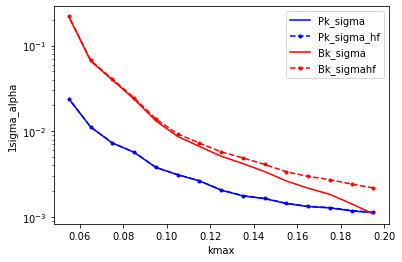

In [31]:
datap = np.load('../GLAM_Ps/pk_1sigma.npz')
datab = np.load('bkk_1sigma.npz')
dataj = np.load('join_1sigma.npz')
plt.semilogy(datap["kmax"],datap["sigma"],'b',label="Pk_sigma")
plt.semilogy(datap["kmax"],datap["sigmahf"],'b.--',label="Pk_sigma_hf")
#plt.plot(dataj["kmax"],dataj["sigma"]*10,'c',label="joint_sigmax10")
plt.semilogy(datab["kmax"],datab["sigma"],"r",label="Bk_sigma")
plt.semilogy(datab["kmax"],datab["sigmahf"],"r.--",label="Bk_sigmahf")

plt.xlabel("kmax")
plt.ylabel("1sigma_alpha")

plt.legend()


In [5]:
datab.files

['kmax', 'sigmahf', 'sigma', 'hf']

In [11]:
datab["hf"]

array([4.11160714, 2.85139319, 2.23543689, 1.87195122, 1.63587922,
       1.47124601, 1.35242291, 1.26337449, 1.1961039 , 1.14409938,
       1.10431655, 1.07342657, 1.05017104, 1.03251121, 1.01993355])

In [13]:
datab["kmax"]

array([0.195, 0.185, 0.175, 0.165, 0.155, 0.145, 0.135, 0.125, 0.115,
       0.105, 0.095, 0.085, 0.075, 0.065, 0.055])

In [17]:
datab["sigmahf"]/datab["sigma"]

array([2.00941698, 1.7012891 , 1.48466007, 1.37253677, 1.28100354,
       1.21296337, 1.16361749, 1.12446718, 1.09472733, 1.07042302,
       1.05173806, 1.0369661 , 1.02676788, 1.01852839, 1.02461837])